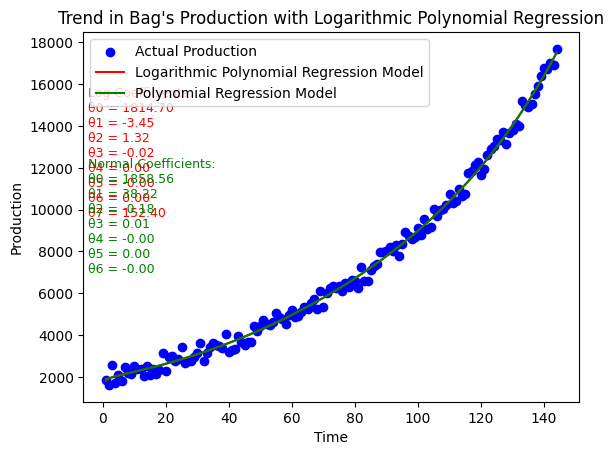

In [2]:
# Problem 1: Build the Trend Model for EIGER Bags Production Data
import matplotlib.pyplot as plt
import numpy as np

# Define the dataset
Columns = ['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'M10', 'M11', 'M12', 'M13', 'M14', 'M15', 'M16', 'M17', 'M18', 'M19', 'M20', 'M21', 'M22', 'M23', 'M24', 'M25', 'M26', 'M27', 'M28', 'M29', 'M30', 'M31', 'M32', 'M33', 'M34', 'M35', 'M36', 'M37', 'M38', 'M39', 'M40', 'M41', 'M42', 'M43', 'M44', 'M45', 'M46', 'M47', 'M48', 'M49', 'M50', 'M51', 'M52', 'M53', 'M54', 'M55', 'M56', 'M57', 'M58', 'M59', 'M60', 'M61', 'M62', 'M63', 'M64', 'M65', 'M66', 'M67', 'M68', 'M69', 'M70', 'M71', 'M72', 'M73', 'M74', 'M75', 'M76', 'M77', 'M78', 'M79', 'M80', 'M81', 'M82', 'M83', 'M84', 'M85', 'M86', 'M87', 'M88', 'M89', 'M90', 'M91', 'M92', 'M93', 'M94', 'M95', 'M96', 'M97', 'M98', 'M99', 'M100', 'M101', 'M102', 'M103', 'M104', 'M105', 'M106', 'M107', 'M108', 'M109', 'M110', 'M111', 'M112', 'M113', 'M114', 'M115', 'M116', 'M117', 'M118', 'M119', 'M120', 'M121', 'M122', 'M123', 'M124', 'M125', 'M126', 'M127', 'M128', 'M129', 'M130', 'M131', 'M132', 'M133', 'M134', 'M135', 'M136', 'M137', 'M138', 'M139', 'M140', 'M141', 'M142', 'M143', 'M144']
Rows = [1863, 1614, 2570, 1685, 2101, 1811, 2457, 2171, 2134, 2502, 2358, 2399, 2048, 2523, 2086, 2391, 2150, 2340, 3129, 2277, 2964, 2997, 2747, 2862, 3405, 2677, 2749, 2755, 2963, 3161, 3623, 2768, 3141, 3439, 3601, 3531, 3477, 3376, 4027, 3175, 3274, 3334, 3964, 3649, 3502, 3688, 3657, 4422, 4197, 4441, 4736, 4521, 4485, 4644, 5036, 4876, 4789, 4544, 4975, 5211, 4880, 4933, 5079, 5339, 5232, 5520, 5714, 5260, 6110, 5334, 5988, 6235, 6365, 6266, 6345, 6118, 6497, 6278, 6638, 6590, 6271, 7246, 6584, 6594, 7092, 7326, 7409, 7976, 7959, 8012, 8195, 8008, 8313, 7791, 8368, 8933, 8756, 8613, 8705, 9098, 8769, 9544, 9050, 9186, 10012, 9685, 9966, 10048, 10244, 10740, 10318, 10393, 10986, 10635, 10731, 11749, 11849, 12123, 12274, 11666, 11960, 12629, 12915, 13051, 13387, 13309, 13732, 13162, 13644, 13808, 14101, 13992, 15191, 15018, 14917, 15046, 15556, 15893, 16388, 16782, 16716, 17033, 16896, 17689]

# Data Conversion (make it float for numerical computation)
x = np.array(range(1, len(Rows) + 1), dtype=float)
y = np.array(Rows, dtype=float)

# Polynomial Regression (doesn't mean it's a linear model)
# Each (x) is raised to a power (degree) and multiplied by a coefficient (theta) to form a polynomial equation.
def generate_log_polynomial_features(x, degree):
    X_poly_log = np.ones((len(x), degree + 2), dtype=float)
    for i in range(1, degree + 1):
        X_poly_log[:, i] = x ** i
    X_poly_log[:, -1] = np.log(x)
    return X_poly_log

def generate_normal_polynomial_features(x, degree):
    X_poly_normal = np.ones((len(x), degree + 1), dtype=float)
    for i in range(1, degree + 1):
        X_poly_normal[:, i] = x ** i
    return X_poly_normal

"""
    in this case, the polynomial degree is 101 
    which means the equation will be of the form 
    y = theta_0 + theta_1 * x + theta_2 * x^2 + ... + theta_101 * x^101
"""
# degree = 1 # A linear model (y = theta_0 + theta_1 * x) so it will be a straight line
degree = 3 # Seems like a good degree to start with
# degree = 101 # There's a high chance that the model will overfit the data

# A higher degree may lead to overfitting, while a lower degree may lead to underfitting.

"""
    What is Overfitting, you say?
    Overfitting occurs when a model learns to the very detail 
    and noise (random fluctuations may be due to outside factors) in the training data.
    This results in poor generalization to new data. However.... (hold on there bud there's a but.)
    ...it may perform very very well on the training data. This is a bad model for a machine learning.
"""
""" 
    This function is to transform the orgin data to polynomial features.
    What I mean by transforming is that EACH x value or data point is raised to a power & multiplied by a coefficient.
    Turning a simple linear equation into a polynomial equation.
    For example, if the degree is 3, then the equation will be:
    y = theta_0 + theta_1 * x + theta_2 * x^2 + theta_3 * x^3
"""
X_poly_log = generate_log_polynomial_features(x, degree)
X_poly_normal = generate_normal_polynomial_features(x, degree)
"""
    Step 1:
        - Imagine (x) as a vector (list) of data points.
        - Each data point represent an independent variable (time, sequence, etc.)
    
    Step 2:
        - Takes each data point in (x) and transform it into a polynomial feature.
        For example, let's say the degree is 21 for the case above.
        it will generate freatures for x^0 (which is 1), x^1 (x value or original val),
        x^2 (squared value), x^3 (cube value), ..., x^21 (21st power value).

    Step 3:
        Now each original data in (x) is represented by a row in the polynomial matrix (X_poly_log).
        Each column in X_poly_log corredponds to a power of x (from x^0 to x^21 in this case).
        So if you had 100 data points in (x), and you're using a polynomial degree of 21,
        X_poly_log would be a matrix of shape (100, 22) or 100 rows and 22 columns.
        (one for each degree from 0 to 21, and one for the constant term)        
"""

"""
        Why a Matrix? Maybe you're asking.
        The reason we use a matrix as a representation it is crucial for polynomial 
        regression because it allows the user to perform linear algebra techniques
        to compute the coefficients (theta) of the polynomial equation.

        So what is theta?
        Theta refers to the coefficients of the polynomial equation that the regression model trying to fit.
        These coefficients determine the shape of the polynomial curve that best fits the data.
"""


# Compute the Coefficients (Theta)
"""
    This is basically computing the dot product of the
    transposed of the polynomial matrix X_poly_log
"""
theta_log = np.linalg.inv(X_poly_log.T.dot(X_poly_log)).dot(X_poly_log.T).dot(y)
theta_normal = np.linalg.inv(X_poly_normal.T.dot(X_poly_normal)).dot(X_poly_normal.T).dot(y)

# Make Predictions
y_pred_log = X_poly_log.dot(theta_log)
y_pred_normal = X_poly_normal.dot(theta_normal)

# Convert coefficients to after the numerical computation to string for visualization
theta_log_str = "Log Coefficients:\n" + "\n".join([f"θ{i} = {coef:.2f}" for i, coef in enumerate(theta_log)])
theta_normal_str = "Normal Coefficients:\n" + "\n".join([f"θ{i} = {coef:.2f}" for i, coef in enumerate(theta_normal)])

# Visualization
# You can see the difference between the two models if you zoom in on the graph
plt.scatter(x, y, color='blue', label='Actual Production')
plt.plot(x, y_pred_log, color='red', label='Logarithmic Polynomial Regression Model')
plt.plot(x, y_pred_normal, color='green', label='Polynomial Regression Model')
plt.title('Trend in Bag\'s Production with Logarithmic Polynomial Regression')
plt.xlabel('Time')
plt.ylabel('Production')
plt.legend()

# Print coefficients on the plot
plt.text(0.01, 0.50, theta_log_str, fontsize=9, color='red', transform=plt.gca().transAxes)
plt.text(0.01, 0.35, theta_normal_str, fontsize=9, color='green', transform=plt.gca().transAxes)

plt.show()

In [3]:
# Problem 2: Convert the Model to a Numerical Form
print("Problem 2: Convert the Model to a Numerical Form")
# Logarithmic Polynomial Regression Coefficients
print("Logarithmic Polynomial Regression Coefficients: ", end=" ")
print(theta_log)
# Results:
# Logarithmic Polynomial Regression Coefficients:[ 1.94596386e+03  6.25414715e+01 -2.88530434e-01  4.40786757e-03 -1.61123501e+02]

# Normal Polynomial Regression Coefficients
print("Normal Polynomial Regression Coefficients: ", end=" ")
print(theta_normal)
# Results:
# Normal Polynomial Regression Coefficients:[ 1.74850672e+03  4.72235525e+01 -1.34357030e-01  3.86326992e-03]

print("""\nAccuracy Considerations:
    1. Degree of the Polynomial: 
        The choice of the polynomial degree has a significant impact 
        on the model's accuracy. A higher degree can lead to overfitting, 
        where the model captures noise in the data rather than the underlying trend. 
        Conversely, a lower degree might result in underfitting, 
        missing the complexity of the data's trend. The code example uses a 
        degree of 3 for one model and incorporates logarithmic features in another, 
        attempting to balance accuracy and generalization.

    2. Numerical Stability: 
        Operations like matrix inversion can be numerically unstable if the matrix
        is not well-conditioned. This can affect the accuracy of the computed coefficients.
        However, in practice, libraries like NumPy use algorithms designed to 
        mitigate these issues, ensuring the accuracy of the results.

    3. Data Representation: 
        The conversion of the mathematical model to its numerical form assumes
        that the data accurately represents the phenomenon being modeled. 
        Any inaccuracies in the data collection process can propagate through the model, 
        affecting its accuracy.""")

Problem 2: Convert the Model to a Numerical Form
Logarithmic Polynomial Regression Coefficients:  [ 1.81469728e+03 -3.44692398e+00  1.32440608e+00 -1.74641779e-02
  1.84699287e-04 -9.88875384e-07  2.46104419e-09  1.52397502e+02]
Normal Polynomial Regression Coefficients:  [ 1.85856465e+03  3.82215452e+01 -1.83903509e-01  1.23140761e-02
 -1.26774036e-04  6.40926666e-07 -8.95245060e-10]

Accuracy Considerations:
    1. Degree of the Polynomial: 
        The choice of the polynomial degree has a significant impact 
        on the model's accuracy. A higher degree can lead to overfitting, 
        where the model captures noise in the data rather than the underlying trend. 
        Conversely, a lower degree might result in underfitting, 
        missing the complexity of the data's trend. The code example uses a 
        degree of 3 for one model and incorporates logarithmic features in another, 
        attempting to balance accuracy and generalization.

    2. Numerical Stability: 
    

In [4]:
# Problem 3: Predict Future Production and Determine When to Build a New Warehouse (It says EGIER need 13 months to build a new warehouse)

"""
    To find when EGIER needs to start building a new warehouse,
    we need to predict future production using the trend model.
    By solving the time variable (x) in this case, we can determine when production exceeds 25,000.
    Given that EGIER needs 13 months to build a new warehouse, 
    We need to FIND the MONTH when the production exceeds 25,000, then SUBTRACT 13 months for construction lead time.
    This will give us the month when EGIER needs to start building a new warehouse.
"""

print("\nProblem 3: Predict Future Production and Determine When to Build a New Warehouse")
def predict_production(month, theta):
    # Generate features for the given month using the same logic as in generate_log_polynomial_features
    features = np.ones(len(theta))
    for i in range(1, len(theta) - 1):
        features[i] = month ** i
    features[-1] = np.log(month)
    # Predict production using the dot product of features and coefficients
    return np.dot(features, theta)

# Start searching from the month after the last data point
start_month = len(Rows) + 1

# Iterate over future months to find when production exceeds 25,000
for future_month in range(start_month, start_month + 500):  # Assuming a max of 500 months ahead
    predicted_production = predict_production(future_month, theta_log)
    if predicted_production > 25000:
        # Found the month when production exceeds 25,000, subtract 13 months for construction lead time
        build_start_month = future_month - 13
        print(f"EGIER needs to start building a new warehouse at month {build_start_month}.")
        break


Problem 3: Predict Future Production and Determine When to Build a New Warehouse
EGIER needs to start building a new warehouse at month 152.
